In [1]:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from std_msgs.msg import String
#from deepface import DeepFace

In [2]:
import sys
#sys.path.remove('/opt/ros/melodic/lib/python2.7/dist-packages')## SI NO TIENEN ROS COMENTEN ESTA LINEA
import cv2
from cv_bridge import CvBridge, CvBridgeError
bridge = CvBridge()


In [ ]:

from deepface import DeepFace

In [3]:
import rospy
import face_recognition
from sensor_msgs.msg import Image , LaserScan , PointCloud2
rospy.init_node("face_recognition")
from hmm_navigation.msg import NavigateActionGoal , NavigateActionResult   ###BETA OPTIONAL


In [1]:

from  smach_utils2 import *

In [ ]:

protoFile = "/home/takeshi/openpose/models/pose/body_25/pose_deploy.prototxt"
weightsFile = "/home/takeshi/openpose/models/pose/body_25/pose_iter_584000.caffemodel"
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [ ]:
from rospkg import RosPack

rp = RosPack()
path_for_faces = rp.get_path('config_files')+'/faces_for_recognition/'

In [ ]:
image=rgbd.get_image()
plt.imshow(image)

In [ ]:
#rospy.sleep(5)
data = rospy.wait_for_message("/usb_cam/image_raw",Image,timeout=5) ### FOR DEBUGGING: WHEN USING ROBOT PLEASE CHANGE THIS TOPIC ACCORDINGLY
cv2_img = bridge.imgmsg_to_cv2(data)#, "bgr8")
plt.imshow(cv2_img)
image=np.copy(cv2_img)


In [ ]:
frame=image
inHeight = frame.shape[0]
inWidth = frame.shape[1]


# Prepare the frame to be fed to the network
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

# Set the prepared object as the input blob of the network
net.setInput(inpBlob)

output = net.forward()

In [ ]:
output.shape

In [ ]:
frame2 = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
frame = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)

In [ ]:
H = output.shape[2]
W = output.shape[3]
threshold=0.5
# Empty list to store the detected keypoints
points = []
for i in range(10):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    

    # Find global maxima of the probMap.
    _, prob,_, point = cv2.minMaxLoc(probMap)
    print (point, prob)

    # Scale the point to fit on the original image
    x = (inWidth * point[0]) / W
    y = (inHeight * point[1]) / H

    if prob > threshold :
        cv2.circle(frame, (int(x), int(y)), 1, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.51, (0, 0, 255), 1, lineType=cv2.LINE_AA)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

cv2.imshow("Output-Keypoints",frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
i = 1
probMap = output[0, i, :, :]
probMap = cv2.resize(probMap, (inWidth, inHeight))



#plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

#plt.imshow(probMap, alpha=0.6)

In [ ]:
mask=np.where(probMap>0.3)
npmask=np.asarray(mask).T



In [ ]:
dfs = DeepFace.find(image,path_for_faces)

In [ ]:
points_data=rgbd.get_points()


In [ ]:
def probmap_to_3d_mean(points_data,probMap, thres_prob=0.3):

    mask=np.where(probMap>thres_prob)
    npmask=np.asarray(mask).T

    npmask.shape
    xyz=[]
    if len (npmask)>1:
        for a in npmask:
            ix,iy=a[0],a[1]
            aux=(np.asarray((points_data['x'][ix,iy],points_data['y'][ix,iy],points_data['z'][ix,iy])))
            #print (aux)
            if np.isnan(aux[0]) or np.isnan(aux[1]) or np.isnan(aux[2]):
                    'reject point'
            else:
                xyz.append(aux)

    xyz=np.asarray(xyz)
    #print (xyz)
    cent=xyz.mean(axis=0)
    return cent


In [ ]:
cent=probmap_to_3d_mean(rgbd.get_points(),probMap,0.3 )

In [ ]:
tf_man.pub_static_tf(pos=cent,point_name='neck', ref= 'head_rgbd_sensor_link',)

In [ ]:
def point_2D_3D(points_data, px_y, px_x):
    ##px pixels /2D world  P1 3D world
    ## rgbd pOINTCLOUD2 numpify
    P = np.asarray((points_data[px_y, px_x]['x'], points_data[px_y, px_x]['y'], points_data[px_y, px_x]['z']))
    return P


In [ ]:
probMap
npmask= np.where(probMap<0.1,0,probMap)

In [ ]:
npmask.shape

In [ ]:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from std_msgs.msg import String
#from deepface import DeepFace
from  smach_utils2 import *
data = rospy.wait_for_message("/usb_cam/image_raw",Image,timeout=5) ### FOR DEBUGGING: WHEN USING ROBOT PLEASE CHANGE THIS TOPIC ACCORDINGLY
cv2_img = bridge.imgmsg_to_cv2(data)#, "bgr8")
plt.imshow(cv2_img)
image=np.copy(cv2_img)


In [2]:
from face_recog.msg import *

In [3]:
from face_recog.srv import *

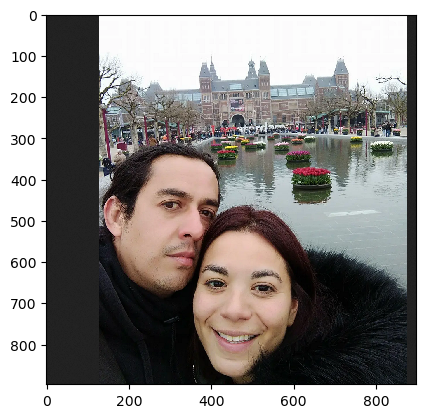

In [6]:
cv2_img_bgr= cv2.imread('/home/oscar/Pictures/meandbere.png')
cv2_img = cv2.cvtColor(cv2_img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(cv2_img)

In [7]:
### LAUNCH SERVICE OR WAIT FOREVER (VALOR MORGULIS)

rospy.wait_for_service('recognize_face')

In [ ]:
### LAUNCH SERVICE OR WAIT FOREVER (VALOR MORGULIS)
rospy.wait_for_service('new_face')
rospy.wait_for_service('analyze_face')



In [8]:
train_new_face = rospy.ServiceProxy('new_face', RecognizeFace)    
recognize = rospy.ServiceProxy('recognize_face', RecognizeFace)    
analyze = rospy.ServiceProxy('analyze_face', RecognizeFace)    

In [11]:
req=RecognizeFaceRequest()

strings=Strings()
string_msg= String()
string_msg.data='any'
req.Ids.ids.append(string_msg)

img_msg=bridge.cv2_to_imgmsg(cv2_img)

req.in_.image_msgs.append(img_msg)
res=recognize(req)
print(res)
name=res.Ids.ids
#res = analyze_face(req)
#print(res, name)

Ds: 
  data: [0.6081355810165405, 0.46982309222221375]
Angs: 
  data: [379.0, 468.0, 647.0, 200.0, 587.0, 617.0, 855.0, 349.0]
Ids: 
  ids: 
    - 
      data: "Jack"
    - 
      data: "unknown"


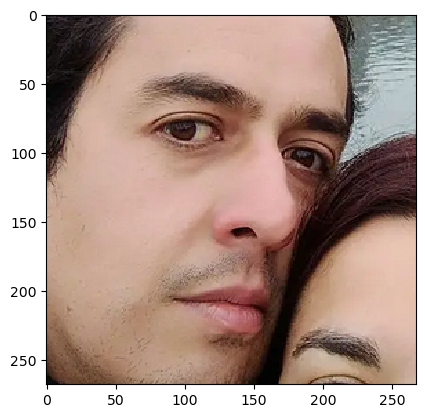

In [13]:


boundRect=np.asarray(res.Angs.data).astype('int')
plt.imshow(cv2_img[boundRect[0]:boundRect[2],boundRect[3]:boundRect[1]]                )
#plt.imshow(cv2_img[boundRect[4]:boundRect[6],boundRect[7]:boundRect[5]]                )



In [ ]:
results=[]
for chars in res.Ids.ids:
    results.append(chars.data)

In [ ]:
analyze_face_from_image(image, name[0].data)

In [ ]:
results=[]
for chars in res.Ids.ids: # Results from analyze service
    results.append(chars.data)
results
name= 'Jack'
pronoun='She'
if results[0]=='Man':pronoun='He'
    
takeshi_line= name+' has arrived A '+results[0]+' I believe '+pronoun +' is  around '+results[-1]+' years old. I would say he is a bit '+results[2]+ ' And I would guess '+pronoun+' is of '+ results[1]+' descent.'
print (takeshi_line)

In [ ]:
boundRect=np.asarray(res.Angs.data).astype('int')
plt.imshow(cv2_img[boundRect[0]:boundRect[1],boundRect[3]:boundRect[2]]                )
#plt.imshow(cv2_img[34:201,67:67+167])

In [ ]:
name= 'Jack'
pronoun='She'
if results[0]=='Man':pronoun='He'
    
takeshi_line= name+' has arrived A '+results[0]+' I believe '+pronoun +' is  around '+results[-1]+' years old. I would say he is a bit '+results[2]+ ' And I would guess he is of '+ results[1]+' descent.'


In [ ]:
pronoun='She'
if results[0]=='Man':pronoun='He'
    

In [ ]:
boundRect=np.asarray(res.Angs.data).astype('int')
plt.imshow(cv2_img[boundRect[0]:boundRect[1],boundRect[3]:boundRect[2]]                )

In [ ]:
name=res.Ids.ids[0].data
#talk('I found you, I Think you are .' + name)
#print(res.Angs.data)
points = rgbd.get_points()
boundRect=np.asarray(res.Angs.data).astype('int')                
trans = bbox_3d_mean(points, boundRect)
print(trans)
#############################################################################################
##############################################################################################
tf_man.pub_static_tf(pos=trans, point_name=name, ref='head_rgbd_sensor_link')

rospy.sleep(0.3)
tf_man.change_ref_frame_tf(res.Ids.ids[0].data)


try:
    trans,quat = tf_man.getTF(target_frame=name)
except (tf2_ros.LookupException, tf2_ros.ConnectivityException, tf2_ros.ExtrapolationException):
    print ( 'No TF FOUND')
omni_base.move_d_to(1.5, name )
print (trans)
#head.absolute(*trans)

talk (name +'... I will lead you to the living room, please follow me')

return 'succ'

In [ ]:

robot, robotquat = tf_man.getTF('base_link')
new_yaw = (tf.transformations.euler_from_quaternion(robotquat)[2]+np.pi) 
print (new_yaw)
        # go to living room an do a 180
res = omni_base.move_base(robot[0], robot[1], new_yaw,10)


In [ ]:
bbox_3d_mean(points,boundRect )

In [ ]:
bbox_3d_mean(points[boundRect[0]:boundRect[1],boundRect[3]:boundRect[2]] )

In [ ]:
string_msg.data='Jack'
res=train_new_face(req)  ### FOR TRAINING! IF NAME IS REPETAED WILL CRASH
res

In [ ]:
type (boundRect), 

In [ ]:
from smach_utils2 import *

In [ ]:
points=rgbd.get_points()

In [ ]:
def bbox_3d_mean(points,bbox):
    
    xyz=[]
    bbox[0]
    for i in np.arange((int)(bbox[0]),(int)(bbox[0])+(int)(bbox[2])):
        for j in np.arange((int)(bbox[1]),(int)(bbox[1])+(int)(bbox[3])):
            aa=np.asarray(points[['x','y','z']][i,j])
            if np.isnan(np.asarray((aa['x'],aa['y'],aa['z']))).sum() ==0:                   
                xyz.append(np.asarray((aa['x'],aa['y'],aa['z'])) )
    return np.asarray(xyz).mean(axis=0)

In [ ]:
def bbox_3d_mean(points,bbox):
    
    xyz=[]

    for i in np.arange((int)(21.0),(int)(21.0)+(int)(187.0)):
        for j in np.arange((int)(178.0),(int)(178.0)+(int)(344.0)):
            aa=np.asarray(points[['x','y','z']][i,j])
            if np.isnan(np.asarray((aa['x'],aa['y'],aa['z']))).sum() ==0:                   
                xyz.append(np.asarray((aa['x'],aa['y'],aa['z'])) )

In [ ]:
x,y,z=xyzz.mean(axis=0)
x,y,z

In [ ]:
bbox=(21,178,187,344)

In [ ]:
trans=bbox_3d_mean(points,bbox)
trans

In [ ]:
trans=xyzz.mean(axis=0)
trans[2]+=600
trans

In [ ]:
points

In [ ]:
aux=(points[['x','y','z']][-20,410])
#np.isnan(aux)
aa=np.asarray(aux)
np.isnan(np.asarray((aa['x'],aa['y'],aa['z']))).sum()==0

In [ ]:
21.0, 178.0, 187.0, 344.0
for i 

aux=(points[['x','y','z']][-20,410])

In [ ]:
plt.imshow (points['x'])

In [ ]:
data=(21.0, 178.0, 187.0, 344.0)
data

In [ ]:
try:
    res=DeepFace.extract_faces(image )
    print ('face found')
    dfs = DeepFace.find(image,path_for_faces)
    print('id',dfs[0]['identity'].iloc[0].split('/')[-2])
except(ValueError): 
    print('No Face')

In [ ]:
#### DISPLAY IMAGE?#############3
#obj=res
pt1 = res[0]['facial_area']['x'],res[0]['facial_area']['y'] 
pt2=  res[0]['facial_area']['x']+res[0]['facial_area']['w'] , res[0]['facial_area']['y']+ res[0]['facial_area']['h']
img=cv2.rectangle(image, pt1,pt2, (0, 0, 255), 2)
img = cv2.putText(img, dfs[0]['identity'].iloc[0].split('/')[-2], pt1, cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (255, 0, 0), 2, cv2.LINE_AA)
   


In [ ]:
plt.imshow(cv2_img)

In [ ]:
plt.imshow(img)

In [ ]:
dfs = DeepFace.find(image,path_for_faces)
dfs[0]['identity'].iloc[0].split('/')[-2]

In [ ]:

dfs = DeepFace.find(image,path_for_faces)

In [ ]:
from deepface import DeepFace

In [ ]:
objs = DeepFace.analyze(image, 
        actions = ['age', 'gender', 'race', 'emotion']
)

In [ ]:
objs

In [ ]:
objs[0]['region']

In [ ]:
objs[0]['dominant_gender'],objs[0]['dominant_race'],objs[0]['dominant_emotion'],objs[0]['age']

In [ ]:
for st in (objs[0]['dominant_gender'],objs[0]['dominant_race'],objs[0]['dominant_emotion'],objs[0]['age']):
    print (st)

In [ ]:
objs[0]['age']

In [ ]:
from face_recog.msg import *

In [ ]:
from face_recog.srv import *

In [ ]:
def train_face(image, name):
    req=RecognizeFaceRequest()
    strings=Strings()
    string_msg= String()
    string_msg.data=name
    req.Ids.ids.append(string_msg)

    img_msg=bridge.cv2_to_imgmsg(image)
    req.in_.image_msgs.append(img_msg)
    res=train_new_face(req)
    return res.Ids.ids[0].data.split(' ')[0] == 'trained'

In [ ]:
### LAUNCH SERVICE OR WAIT FOREVER (VALOR MORGULIS)

rospy.wait_for_service('recognize_face')

In [ ]:
### LAUNCH SERVICE OR WAIT FOREVER (VALOR MORGULIS)
rospy.wait_for_service('new_face')


In [ ]:
train_new_face = rospy.ServiceProxy('new_face', RecognizeFace)    
recognize = rospy.ServiceProxy('recognize_face', RecognizeFace)    

In [ ]:
req=RecognizeFaceRequest()

strings=Strings()
string_msg= String()
string_msg.data='any'
req.Ids.ids.append(string_msg)

img_msg=bridge.cv2_to_imgmsg(cv2_img)
req.in_.image_msgs.append(img_msg)
res=recognize(req)
res

In [ ]:
plt.imshow(cv2_img)

In [ ]:
req=RecognizeFaceRequest()

strings=Strings()
string_msg= String()
string_msg.data='Jack'
req.Ids.ids.append(string_msg)

img_msg=bridge.cv2_to_imgmsg(image)
req.in_.image_msgs.append(img_msg)




In [ ]:
res=train_new_face(req)  ### FOR TRAINING! IF NAME IS REPETAED WILL CRASH
res

In [ ]:
import face_recognition

In [ ]:
face_recognition.face_locations(cv2_img)

In [ ]:
###################Using Navigation to get to a Distance from this face$$

In [ ]:
listener = tf.TransformListener()
broadcaster = tf.TransformBroadcaster()
pub_goal= rospy.Publisher('/navigate/goal', NavigateActionGoal, queue_size=1)

In [ ]:
d=res.Ds.data[0]
D_to_person=0.15
pose=np.zeros(3)
pose[2]+=d - D_to_person
quat=np.zeros(4)
quat[-1]=1
    

broadcaster.sendTransform(pose, quat,rospy.Time.now(), 'face','head_rgbd_sensor_link')
for i in range (10):
    try:
        goal_pose, quat=listener.lookupTransform( 'map','face', rospy.Time(0))
        print('yes tf')
        break
    except:
        print  ('No tf')
        rospy.sleep(0.2)

In [ ]:

goal_pose
goal= NavigateActionGoal()
goal.goal.x=goal_pose[0]
goal.goal.y=goal_pose[1]

goal.goal.timeout= 10
nav_res= NavigateActionResult()
pub_goal.publish(goal)

In [ ]:
image

In [ ]:
from smach_utils2 import *

In [ ]:
res= speech_recog_server()

In [ ]:
res.data

In [ ]:
res2=train_face(image,res.data)


In [ ]:
res2.Ids.ids[0].data.split(' ')[0] == 'trained'

In [ ]:
train_face(image,res.data)

In [ ]:
req

In [ ]:

from smach_utils2 import *
from rospkg import RosPack

In [ ]:
rp = RosPack()
path = rp.get_path('config_files')

In [ ]:
path

In [ ]:
from rospkg import RosPack

rp = RosPack()
path_for_faces = rp.get_path('config_files')+'/faces_for_recognition'


In [ ]:
path_for_faces

In [ ]:
path_for_faces = rp.get_path('config_files')

In [ ]:
for person in os.listdir(path_for_faces):
    print (person)

In [ ]:
import os
os.listdir(path_for_faces)[1]

In [ ]:
omni_base.move_base(1,1,np.pi,1)

In [ ]:
print (res)

In [ ]:
robot, robotquat = tf_man.getTF('base_link')
new_yaw = (tf.transformations.euler_from_quaternion(robotquat)[2]+np.pi)
print(new_yaw)
# go to living room an do a 180
res = omni_base.move_base(robot[0], robot[1], new_yaw)

In [ ]:
import human_detector

In [ ]:
#from segmentation.srv import Segmentation, SegmentationResponse 
from human_detector.srv import Human_detector ,Human_detectorResponse 

In [ ]:
cent

In [ ]:
res=Human_detectorResponse()
res.x= cent[0]
res.y= cent[1]
res.z= cent[2]

In [ ]:
hu

In [ ]:
res=human_detect_server.call()

In [ ]:
res

In [ ]:
xyz_cam=np.asarray((res.x,res.y,res.z))

In [ ]:
tf_man.pub_static_tf(pos=xyz_cam,point_name='face',ref="head_rgbd_sensor_rgb_frame")
tf_man.change_ref_frame_tf(point_name='face')

In [ ]:
omni_base.move_d_to(target_link='face')
head.to_tf('face')

In [ ]:
robot, robotquat = tf_man.getTF('base_link')
new_yaw = (tf.transformations.euler_from_quaternion(robotquat)[2]+np.pi)
print(new_yaw)

In [ ]:
res = omni_base.move_base(robot[0], robot[1], new_yaw)

In [ ]:
7%(2*np.pi)

In [ ]:

import numpy as np

In [ ]:
dfs = DeepFace.find(image,path_for_faces,enforce_detection=False)

In [ ]:

print('id',dfs[0]['identity'].iloc[2].split('/')[-2])


In [ ]:
#np.save('image.npy',image)
image=np.load('image.npy')

In [ ]:
DeepFace.extract_faces(image)

In [ ]:
line=analyze_face_from_image(image)

In [ ]:
type(line)

In [ ]:
line

In [ ]:
if line!=True:
    print('yey')

In [ ]:
len('')

In [ ]:
pub_potfields_goal = rospy.Publisher("/clicked_point",PointStamped,queue_size=10)


In [ ]:
#rospy.sleep(5)
trans_dict= human_detect_server()
trans =[trans_dict.x,trans_dict.y,trans_dict.z]         ##FROM HUMAN FINDER OPEN POSE


In [ ]:
tf_man.pub_static_tf(pos=trans,point_name='goal',ref='head_rgbd_sensor_link')
tf_man.change_ref_frame_tf('goal')
pt,_=tf_man.getTF('goal')
head.to_tf('goal')
point= PointStamped()

point.point.x=pt[0]
point.point.y=pt[1]
point.point.z=0.0
pub_potfields_goal.publish(point)
head.to_tf('goal')



In [ ]:
trans =[trans_dict.x,trans_dict.y,trans_dict.z]         ##FROM HUMAN FINDER OPEN POSE
trans

In [ ]:
tf_man.change_ref_frame_tf('goal')
pt,_=tf_man.getTF('goal')

In [ ]:
point= PointStamped()

point.point.x=pt[0]
point.point.y=pt[1]
point.point.z=0.0
pub_potfields_goal.publish(point)


In [ ]:
head.to_tf('goal')

In [ ]:
class_names=['002masterchefcan', '003crackerbox', '004sugarbox', '005tomatosoupcan', '006mustardbottle', '007tunafishcan', '008puddingbox', '009gelatinbox', '010pottedmeatcan', '011banana', '012strawberry', '013apple', '014lemon', '015peach', '016pear', '017orange', '018plum', '019pitcherbase', '021bleachcleanser', '022windexbottle', '024bowl', '025mug', '027skillet', '028skilletlid', '029plate', '030fork', '031spoon', '032knife', '033spatula', '035powerdrill', '036woodblock', '037scissors', '038padlock', '040largemarker', '042adjustablewrench', '043phillipsscrewdriver', '044flatscrewdriver', '048hammer', '050mediumclamp', '051largeclamp', '052extralargeclamp', '053minisoccerball', '054softball', '055baseball', '056tennisball', '057racquetball', '058golfball', '059chain', '061foambrick', '062dice', '063-amarbles', '063-bmarbles', '065-acups', '065-bcups', '065-ccups', '065-dcups', '065-ecups', '065-fcups', '065-gcups', '065-hcups', '065-icups', '065-jcups', '070-acoloredwoodblocks', '070-bcoloredwoodblocks', '071nineholepegtest', '072-atoyairplane', '073-alegoduplo', '073-blegoduplo', '073-clegoduplo', '073-dlegoduplo', '073-elegoduplo', '073-flegoduplo', '073-glegoduplo']
def predict_images(images, plt_images=True):
    imgs=np.zeros((1,300,300,3))
    for image in images :
        img=tensorflow.image.resize(image,(300,300))
        new=np.expand_dims(img.numpy(),axis=0)
        imgs= tensorflow.concat((imgs,new),axis=0)
    #Y_pred = np.argmax(model.predict(imgs[1:,:,:,:]),axis=1)
    #indices = (-numbers).argsort()[:2]
    pred=model.predict(imgs[1:,:,:,:])
    
    
    
    top3=np.argsort(pred)[:,-3:]
    
    Y_pred= top3
    titles=[]
    for i in range( len(Y_pred)):
        titles.append(" 1. "+ class_names[Y_pred[i,2]] +'\n'+ " 2. "+ class_names[Y_pred[i,1]] +'\n'+ " 3. "+ class_names[Y_pred[i,0]] )

    plt.figure(figsize=(10, 10))
    if plt_images:
        for i in range(len(images)):
            ax = plt.subplot(3, 3, i + 1)

            plt.imshow(images[i].astype("uint8"))
            plt.title(titles[i])
            plt.axis("off")
        #
    """
        plt.figure(figsize=(10, 10))

        for i in range(len(images)):
            ax = plt.subplot(3, 3, i + 1)

            plt.imshow(images[i].astype("uint8"))
            plt.title(class_names[Y_pred[i]])
            plt.axis("off")"""
    return top3
    

In [ ]:
def plane_seg_square_imgs(lower=500 ,higher=50000,reg_ly= 30,reg_hy=600,plt_images=True):
    image= rgbd.get_h_image()
    iimmg= rgbd.get_image()
    points_data= rgbd.get_points()
    img=np.copy(image)
    img3= correct_points()


    _,contours, hierarchy = cv2.findContours(img3.astype('uint8'),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    i=0
    cents=[]
    points=[]
    images=[]
    for i, contour in enumerate(contours):

        area = cv2.contourArea(contour)

        if area > lower and area < higher :
            M = cv2.moments(contour)
            # calculate x,y coordinate of center
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])


            boundRect = cv2.boundingRect(contour)
            #just for drawing rect, dont waste too much time on this
            image_aux= iimmg[boundRect[1]:boundRect[1]+max(boundRect[2],boundRect[3]),boundRect[0]:boundRect[0]+max(boundRect[2],boundRect[3])]
            images.append(image_aux)
            img=cv2.rectangle(img,(boundRect[0], boundRect[1]),(boundRect[0]+boundRect[2], boundRect[1]+boundRect[3]), (0,0,0), 2)
            # calculate moments for each contour
            if (cY > reg_ly and cY < reg_hy  ):

                cv2.circle(img, (cX, cY), 5, (255, 255, 255), -1)
                cv2.putText(img, "centroid_"+str(i)+"_"+str(cX)+','+str(cY)    ,    (cX - 25, cY - 25)   ,cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 0), 2)
                print ('cX,cY',cX,cY)
                xyz=[]


                for jy in range (boundRect[0], boundRect[0]+boundRect[2]):
                    for ix in range(boundRect[1], boundRect[1]+boundRect[3]):
                        aux=(np.asarray((points_data['x'][ix,jy],points_data['y'][ix,jy],points_data['z'][ix,jy])))
                        if np.isnan(aux[0]) or np.isnan(aux[1]) or np.isnan(aux[2]):
                            'reject point'
                        else:
                            xyz.append(aux)

                xyz=np.asarray(xyz)
                cent=xyz.mean(axis=0)
                cents.append(cent)
                print (cent)
                points.append(xyz)
            else:
                print ('cent out of region... rejected')
    sub_plt=0
    if plt_images:
        for image in images:

            sub_plt+=1
            ax = plt.subplot(5, 5, sub_plt )

            plt.imshow(image)
            plt.axis("off")

    cents=np.asarray(cents)
    ### returns centroids found and a group of 3d coordinates that conform the centroid
    return(cents,np.asarray(points), images)

In [ ]:
#cents,xyz, images=seg_square_imgs(plt_images=True)
cents,xyz, images=plane_seg_square_imgs(plt_images=True)

static_tf_publish(cents)


predict_images(images)

In [5]:
res= wait_for_face(10)

Got  image with shape (480, 640, 3)
No face FOund Keep scanning
